In [1]:
import dask.dataframe as dd
from dask.distributed import Client, LocalCluster
import time

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_pd = pd.read_csv(("../datasets/cleaned-datasets/Trips_by_Distance-cleaned.csv"))

pd.set_option('display.max_columns', None)

In [107]:
df_pd

,Level,Date,State FIPS,State Postal Code,County FIPS,County Name,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,Number of Trips 3-5,Number of Trips 5-10,Number of Trips 10-25,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,Row ID,Week,Month
0,County,2021-06-06,56.0,WY,56045.0,Weston County,1268,5659,22471,4160,2601,948,1558,5723,2202,3930,1160,166,23,56-56045-20210606,23,6
1,County,2021-06-06,5.0,AR,5011.0,Bradley County,1780,8983,25022,3411,4145,5901,4321,3343,1793,1383,690,35,0,05-05011-20210606,23,6
2,County,2021-06-06,5.0,AR,5013.0,Calhoun County,571,4618,17543,2166,2168,3195,3600,4277,1141,530,425,41,0,05-05013-20210606,23,6
3,County,2021-06-06,5.0,AR,5015.0,Carroll County,4386,23994,77047,14712,16029,11434,13170,14712,4272,1227,1323,132,36,05-05015-20210606,23,6
4,County,2021-06-06,5.0,AR,5017.0,Chicot County,1356,8762,31550,9483,6752,4547,3929,3857,1380,580,957,61,4,05-05017-20210606,23,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988768,County,2019-11-01,19.0,IA,19185.0,Wayne County,1360,5081,28297,5784,2509,152,4114,7260,5522,2398,530,25,3,19-19185-20191101,43,11
988769,County,2019-11-01,19.0,IA,19187.0,Webster County,7633,28271,166016,32150,53230,30574,6450,30274,6826,5116,1058,243,95,19-19187-20191101,43,11
988770,County,2019-11-01,19.0,IA,19189.0,Winnebago County,2377,7977,40352,9789,7624,1480,6670,8829,4652,1101,115,52,40,19-19189-20191101,43,11
988771,County,2019-11-01,19.0,IA,19191.0,Winneshiek County,3972,16019,78526,16644,11304,7741,12374,19696,6665,3832,216,54,0,19-19191-20191101,43,11


In [ ]:
df_pd[df_pd[]]

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Comparing processing time with 10 processors vs 20 processors

## Dask

In [109]:
# Load dataset
df_dd = dd.read_csv("../datasets/cleaned-datasets/Trips_by_Distance-cleaned.csv")

In [110]:
# Function to run Dask task
def run_dask_task(n_workers, dataframe):
    # Start cluster
    cluster = LocalCluster(n_workers)
    client = Client(cluster)
    print(f"Scaling cluster to {n_workers} workers...")

    # Start timing
    start_time = time.time()

    # Perform computation (e.g., finding the mean of a column)
    total_trips = dataframe["Number of Trips"].mean().compute()

    # End timing
    end_time = time.time()

    # Shutdown cluster
    client.close()
    cluster.close()

    # Return execution time
    return end_time - start_time

## Pandas

In [111]:
# Function to run Pandas task
def run_pandas_task(dataframe):
    # Start timing
    start_time = time.time()

    # Perform computation (E.G: finding the mean of a column)
    total_trips = dataframe["Number of Trips"].mean()

    # End timing
    end_time = time.time()

    # Return results
    return end_time - start_time

### Individual testing

In [ ]:
# Run for 10 workers sequentially
results10 = run_dask_task(10)

# Print results
print(f"Total run time: {results10}")

TypeError: run_dask_task() missing 1 required positional argument: 'dataframe'

In [ ]:
# Run for 20 workers sequentially
results20 = run_dask_task(20)

# Print results
print(f"Total run time: {results20}")

Scaling cluster to 20 workers...
20 Workers: total_trips: 435939.20349261153, 
 Total run time: 42.08144927024841


In [ ]:
# Run task with Pandas
results = run_pandas_task(df_pd)

# Print results
print(results20)

total_trips: 435939.20349261153, 
 Total run time: 42.08144927024841


### Preparation for visualisation

In [ ]:
# Run tasks and collect execution times
execution_times = {
    "Processors": ["Pandas", "Dask (10 Workers)", "Dask (20 Workers)"],
    "Execution Time (Seconds)": [
        run_pandas_task(df_pd),
        run_dask_task(10, df_dd),
        run_dask_task(20, df_dd)
    ]
}

# Convert execution times to DataFrame
results_df = pd.DataFrame(execution_times)

C:\Users\thema\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\distributed\node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 60197 instead
  warnings.warn(
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:144: UserWarning: Creating scratch directories is taking a surprisingly long time. (4.43s) This is often due to running workers on a network file system. Consider specifying a local-directory to point workers to write scratch data to a local disk.
  next(self.gen)


Scaling cluster to 10 workers...


C:\Users\thema\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\distributed\node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 60242 instead
  warnings.warn(
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2800.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:144: UserWarning: Creating scratch directories is taking a surprisingly long time. (4.52s) This is often due to running workers on a network file system. Consider specifying a local-directory to point workers to write scratch data to a local disk.
  next(self.gen)


Scaling cluster to 20 workers...


## Visualisation to compare execution times (line chart)

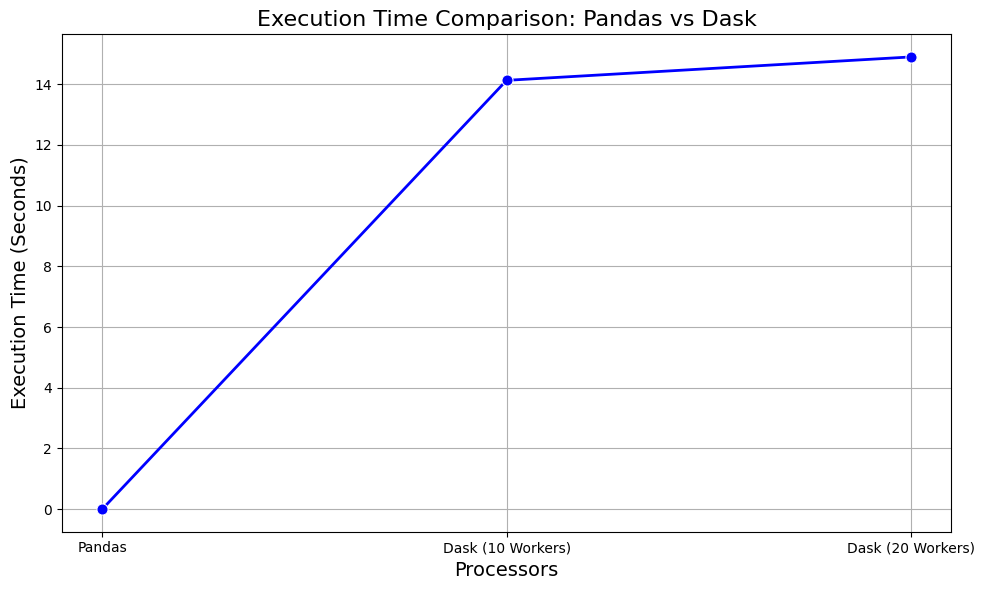

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    x="Processors", 
    y="Execution Time (Seconds)", 
    data=results_df, 
    marker="o", 
    linewidth=2, 
    markersize=8, 
    color="blue"
)
plt.title("Execution Time Comparison: Pandas vs Dask", fontsize=16)
plt.xlabel("Processors", fontsize=14)
plt.ylabel("Execution Time (Seconds)", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
print(results_df)

          Processors  Execution Time (Seconds)
0             Pandas                  0.003983
1  Dask (10 Workers)                 18.436168
2  Dask (20 Workers)                 14.914833


# Regression models

## Linear Regression

In [5]:
# Use one distance column (e.g., 'Trips 10-25 Miles') to predict total trips
x = df_pd[['Number of Trips 10-25']]
y = df_pd['Number of Trips']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 80992.19585624558
R² Score: 0.9674000721560402


### Regression plot

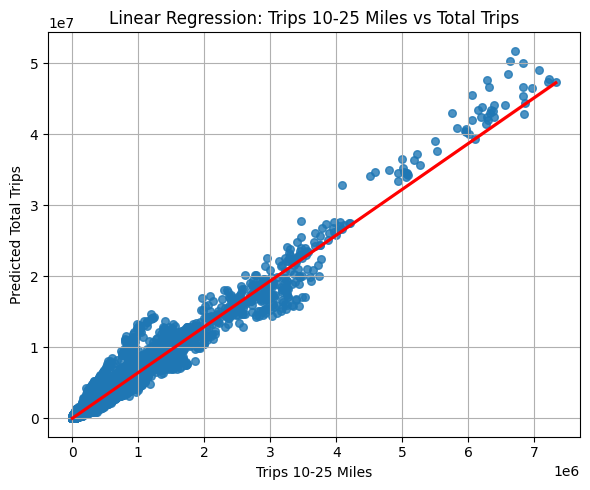

In [ ]:
# Regression Plot
plt.figure(figsize=(6, 5))

sns.regplot(x=x_test['Number of Trips 10-25'], y=y_test, scatter_kws={"s": 30}, line_kws={"color": "red"})

plt.title("Linear Regression: Trips 10-25 Miles vs Total Trips")
plt.xlabel("Trips 10-25 Miles")
plt.ylabel("Predicted Total Trips")
plt.grid(True)
plt.tight_layout()
plt.show()

### Residual plot

In [ ]:
plt.figure(figsize=(12, 8))  # Increase the figure size

# Residual plot
sns.residplot(x=y_pred, y=y_test, scatter_kws={"s": 30})

# Add a red horizontal line at the center (y=0)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

# Add title and labels
plt.title("Residual Plot: Linear Regression", fontsize=16)
plt.xlabel("Predicted Total Trips", fontsize=14)
plt.ylabel("Residuals (Actual - Predicted)", fontsize=14)

# Customize grid and layout
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

## Polynomial Regression

In [6]:
# Use one distance column (e.g., 'Trips 10-25 Miles') to predict total trips
x = df_pd[['Number of Trips 10-25']]
y = df_pd['Number of Trips']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Generate polynomial features
degree = 2  
poly = PolynomialFeatures(degree=degree)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

model = LinearRegression()
model.fit(x_train_poly, y_train)
y_pred = model.predict(x_test_poly)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 81687.55013929443
R² Score: 0.9681497293399518


### Regression plot

C:\Users\thema\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


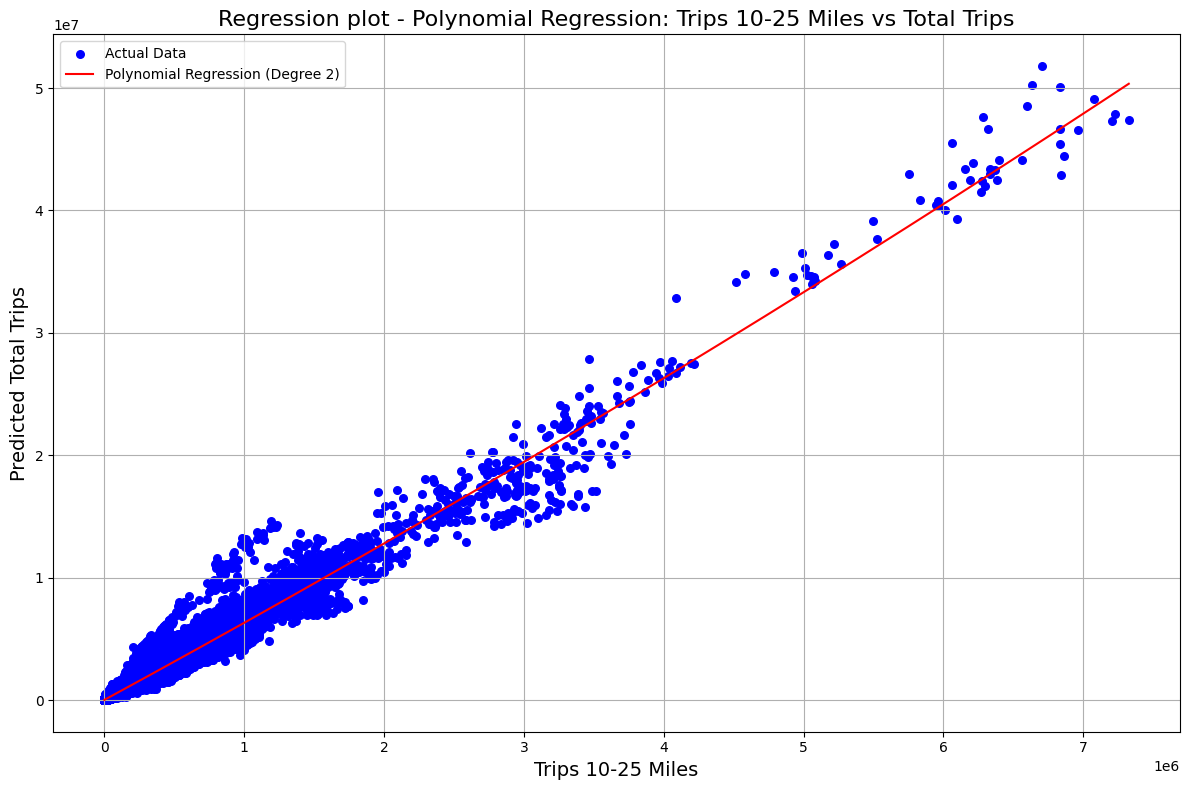

In [ ]:
# --- REGRESSION PLOT ---
plt.figure(figsize=(12, 8))

# Scatter plot of actual data
plt.scatter(x_test, y_test, color='blue', label='Actual Data', s=30)

# Generate a smooth polynomial curve for visualization
x_curve = np.linspace(x_test.min().values[0], x_test.max().values[0], 500).reshape(-1, 1)
x_curve_poly = poly.transform(x_curve) 
y_curve = model.predict(x_curve_poly)

# Plot the polynomial regression curve
plt.plot(x_curve, y_curve, color='red', label=f'Polynomial Regression (Degree {degree})')

# Add title, labels, and legend
plt.title("Regression plot - Polynomial Regression: Trips 10-25 Miles vs Total Trips", fontsize=16)
plt.xlabel("Trips 10-25 Miles", fontsize=14)
plt.ylabel("Predicted Total Trips", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Residual plot

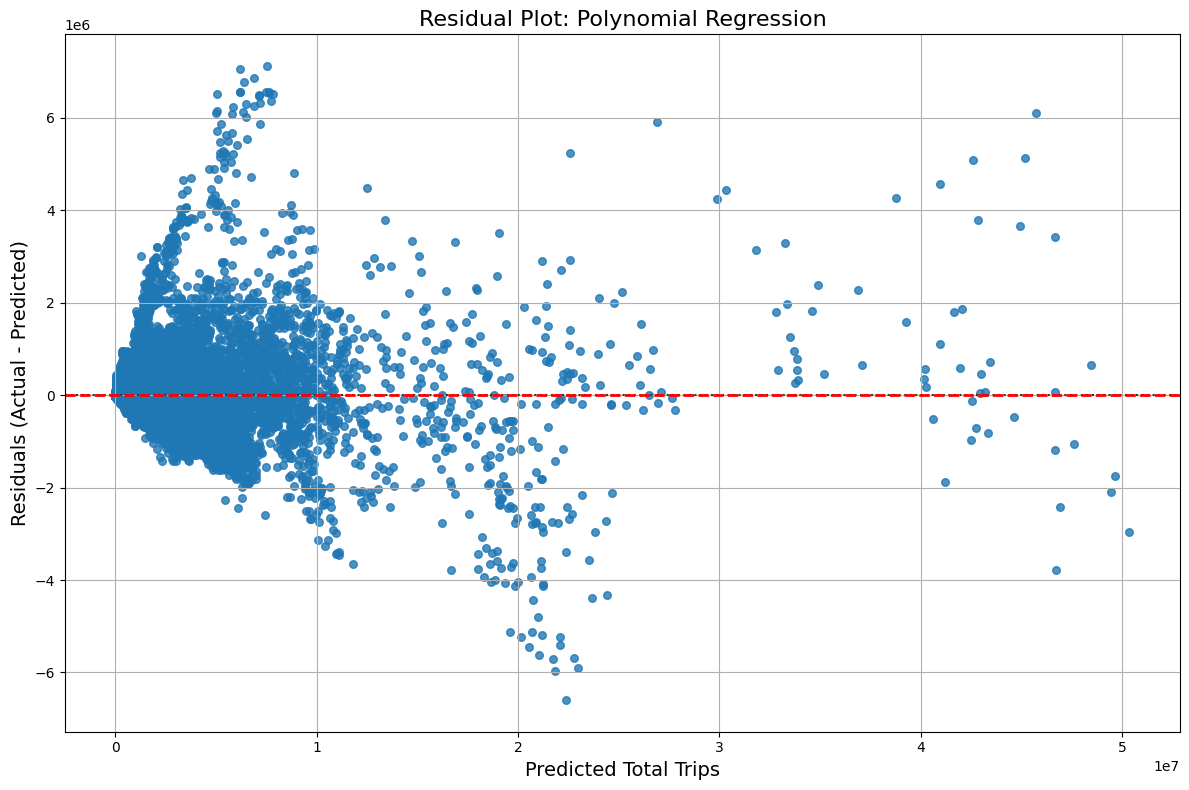

In [ ]:
plt.figure(figsize=(12, 8))  # Increase the figure size

# Residual plot
sns.residplot(x=y_pred, y=y_test, scatter_kws={"s": 30})

# Add a red horizontal line at the center (y=0)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

# Add title and labels
plt.title("Residual Plot: Polynomial Regression", fontsize=16)
plt.xlabel("Predicted Total Trips", fontsize=14)
plt.ylabel("Residuals (Actual - Predicted)", fontsize=14)

# Customize grid and layout
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

## Multiple Regression

In [7]:
# Use one distance column (e.g., 'Trips 10-25 Miles') to predict total trips
x = df_pd[['Number of Trips <1', 'Number of Trips 1-3', 'Number of Trips 3-5',	'Number of Trips 5-10',	'Number of Trips 10-25']]
y = df_pd['Number of Trips']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 8588.384575808152
R² Score: 0.9997109591770859


### Scatter plot

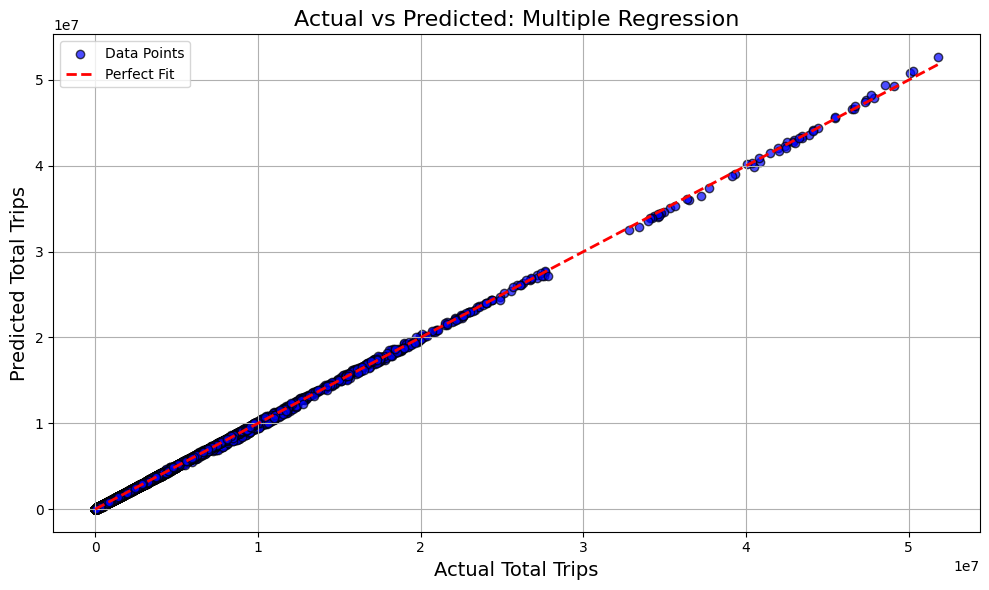

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, label="Data Points")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2, label="Perfect Fit")
plt.title("Actual vs Predicted: Multiple Regression", fontsize=16)
plt.xlabel("Actual Total Trips", fontsize=14)
plt.ylabel("Predicted Total Trips", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Residual plot

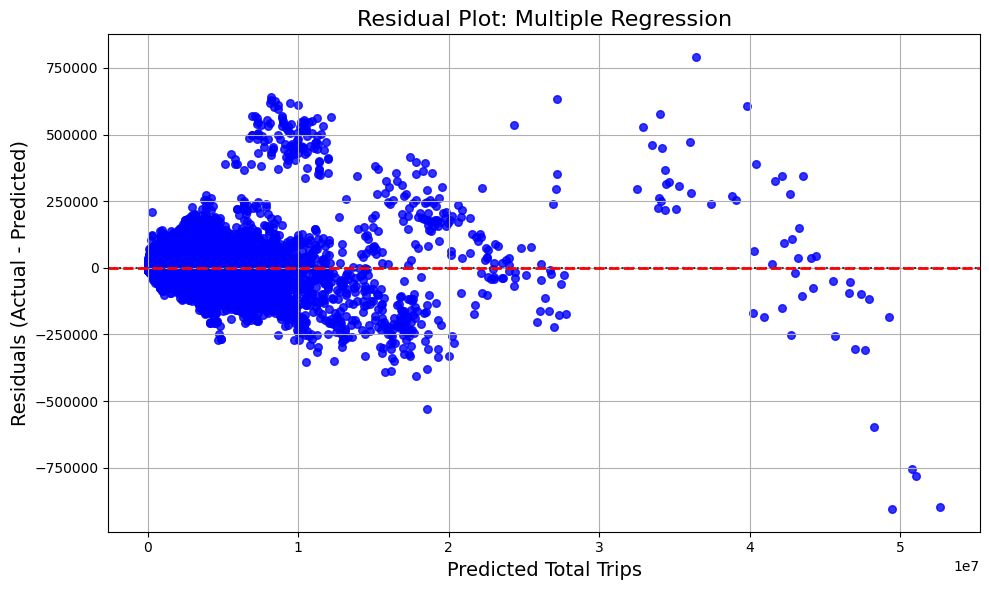

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, scatter_kws={"s": 30}, color="blue")
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label="Zero Residual Line")
plt.title("Residual Plot: Multiple Regression", fontsize=16)
plt.xlabel("Predicted Total Trips", fontsize=14)
plt.ylabel("Residuals (Actual - Predicted)", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()